# Importando e instalando dependências 

In [1]:
import funcs as f
import pandas as pd
import math
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/home/geffte-caetano/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Lendo planilha e definindo df

In [2]:
df_leitura = f.ler_planilha()

In [3]:
mapa_sintomas = {
    'NOSOCOMIAL',
    'AVE_SUINO',
    'FEBRE',
    'TOSSE',
    'GARGANTA',
    'DISPNEIA',
    'DESC_RESP',
    'SATURACAO',
    'DIARREIA',
    'VOMITO',
    'OUTRO_SIN',
    'CLASSI_FIN'
}

In [4]:
df_sivep = pd.DataFrame() 

for column in df_leitura:
    if column in mapa_sintomas:
        df_sivep[column] = df_leitura[column]

In [5]:
for key in df_sivep.keys():
    for linha in df_sivep[key]:
        if math.isnan(linha) and key != 'CLASSI_FIN':
            df_sivep[key] = df_sivep[key].replace(linha, 9)
        elif math.isnan(linha) and key == 'CLASSI_FIN':
            df_sivep[key] = df_sivep[key].replace(linha, 4)

In [6]:
for column in df_sivep:
    if column in mapa_sintomas:
        df_sivep[column] = df_sivep[column].astype(int)

In [7]:
df_sivep

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN
0,2,2,1,1,2,2,1,2,2,2,2,4
1,2,2,1,1,9,1,1,1,9,9,9,4
2,2,2,1,1,2,1,1,1,2,2,2,5
3,2,2,1,1,2,1,1,1,2,2,2,4
4,2,2,1,1,2,1,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2,2,1,1,2,1,1,1,2,2,2,4
2020,2,2,1,1,2,1,1,1,2,2,1,4
2021,2,2,1,1,2,1,1,1,2,2,2,4
2022,2,2,1,1,2,1,1,1,2,2,2,4


In [8]:
df_sivep['CLASSI_FIN'] = df_sivep['CLASSI_FIN'].replace(5, 0)

In [12]:
df_sivep['CLASSI_FIN'].unique()

array([4, 0, 2, 3, 1])

# Classificadores

## XGBOOST

In [9]:
X = df_sivep.drop(columns=['CLASSI_FIN'])
y = df_sivep['CLASSI_FIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1e-05, objective='multi:softprob', num_class=5)

bst.fit(X_train, y_train)

preds = bst.predict(X_test)

Acurácia: 0.43
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        58
           2       0.38      0.21      0.27       136
           4       0.44      0.84      0.58       175

    accuracy                           0.43       405
   macro avg       0.21      0.26      0.21       405
weighted avg       0.32      0.43      0.34       405

Matriz de Confusão:
[[  0   0   6  30]
 [  0   0  12  46]
 [  0   0  28 108]
 [  0   0  28 147]]


/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

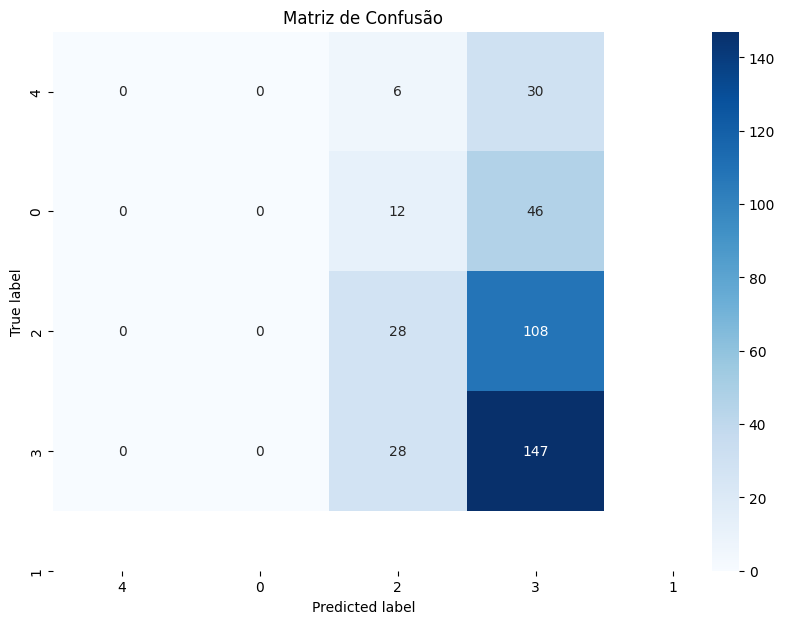

In [10]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, preds)
print(f'Acurácia: {accuracy:.2f}')

# Mostrar relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, preds))

# Mostrar a matriz de confusão
conf_mat = confusion_matrix(y_test, preds)
print("Matriz de Confusão:")
print(conf_mat)

# Obter os nomes das classes
class_names = y.unique()

# Verificar se o número de classes é igual ao tamanho da matriz de confusão
assert conf_mat.shape[0] == conf_mat.shape[1], 'A matriz de confusão deve ser quadrada' 

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels= class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusão')
plt.show()

## RandomForest

In [13]:
X = df_sivep.drop(columns=['CLASSI_FIN'])
y = df_sivep['CLASSI_FIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

rf = RandomForestClassifier(max_depth=10, random_state=0)

rf.fit(X_train, y_train)

preds = rf.predict(X_test)

In [15]:
y_train

1773    2
697     2
88      4
28      4
724     4
       ..
990     0
585     4
292     4
2007    4
1081    1
Name: CLASSI_FIN, Length: 1619, dtype: int64

Acurácia: 0.46
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.23      0.15      0.18        39
           1       0.00      0.00      0.00        51
           2       0.44      0.36      0.40       136
           3       0.00      0.00      0.00         1
           4       0.50      0.74      0.60       178

    accuracy                           0.46       405
   macro avg       0.23      0.25      0.24       405
weighted avg       0.39      0.46      0.41       405

Matriz de Confusão:
[[  6   2   7   0  24]
 [  4   0  19   0  28]
 [  6   0  49   0  81]
 [  0   0   1   0   0]
 [ 10   1  35   0 132]]


/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

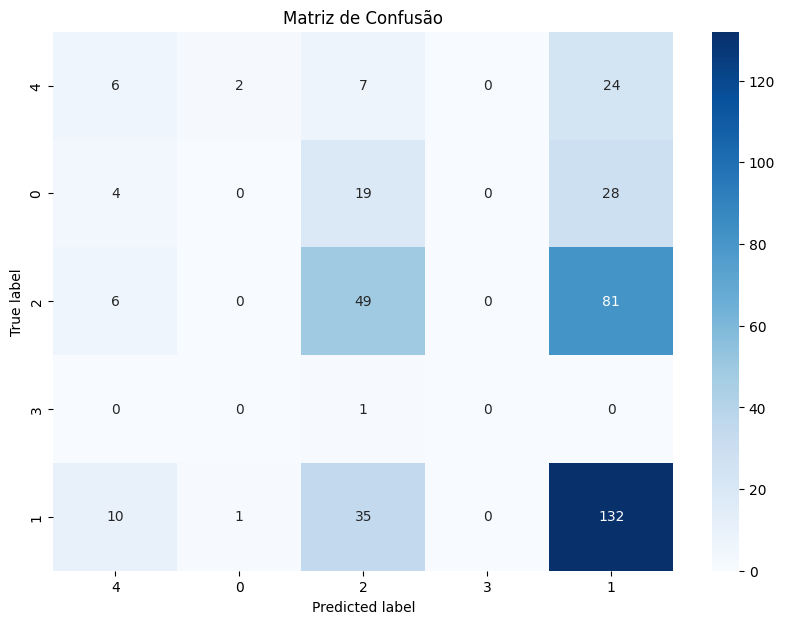

In [14]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, preds)
print(f'Acurácia: {accuracy:.2f}')

# Mostrar relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, preds))

# Mostrar a matriz de confusão
conf_mat = confusion_matrix(y_test, preds)
print("Matriz de Confusão:")
print(conf_mat)

# Obter os nomes das classes
class_names = y.unique()

# Verificar se o número de classes é igual ao tamanho da matriz de confusão
assert conf_mat.shape[0] == conf_mat.shape[1], 'A matriz de confusão deve ser quadrada'

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels= class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusão')
plt.show()



## HistGradient

In [18]:
X = df_sivep.drop(columns=['CLASSI_FIN'])
y = df_sivep['CLASSI_FIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

hgb = HistGradientBoostingClassifier(max_iter=2, max_depth=2, learning_rate=1e-05)

hgb.fit(X_train, y_train)

preds = hgb.predict(X_test)

Acurácia: 0.48
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00         1
           4       0.48      1.00      0.65       193

    accuracy                           0.48       405
   macro avg       0.10      0.20      0.13       405
weighted avg       0.23      0.48      0.31       405

Matriz de Confusão:
[[  0   0   0   0  43]
 [  0   0   0   0  40]
 [  0   0   0   0 128]
 [  0   0   0   0   1]
 [  0   0   0   0 193]]


/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

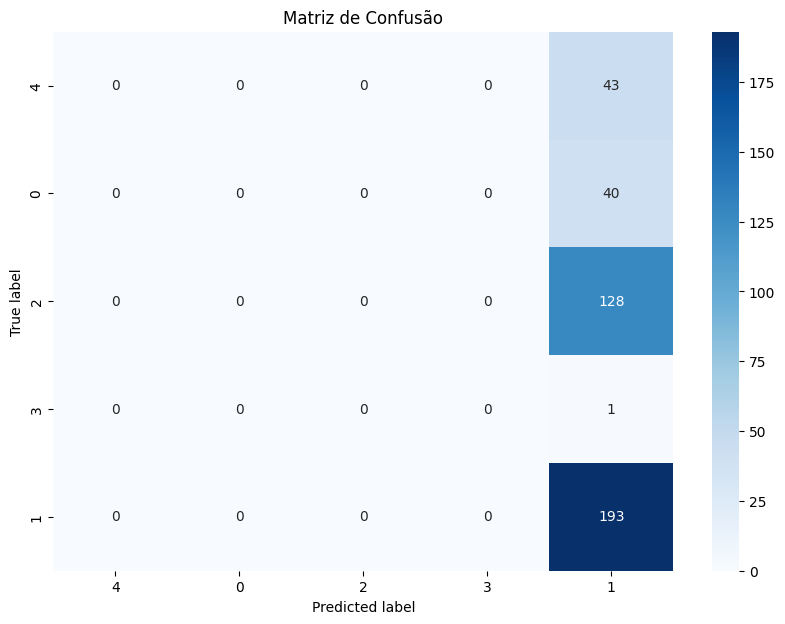

In [19]:
#Calcular a acurácia
accuracy = accuracy_score(y_test, preds)
print(f'Acurácia: {accuracy:.2f}')

# Mostrar relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, preds))

# Mostrar a matriz de confusão
conf_mat = confusion_matrix(y_test, preds)
print("Matriz de Confusão:")
print(conf_mat)

# Obter os nomes das classes
class_names = y.unique()

# Verificar se o número de classes é igual ao tamanho da matriz de confusão
assert conf_mat.shape[0] == conf_mat.shape[1], 'A matriz de confusão deve ser quadrada'

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels= class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusão')
plt.show()

## AdaBoostClassifier

In [20]:
X = df_sivep.drop(columns=['CLASSI_FIN'])
y = df_sivep['CLASSI_FIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

ada = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0, learning_rate=1e-05)

ada.fit(X_train, y_train)

preds = ada.predict(X_test)

Acurácia: 0.46
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       116
           3       0.00      0.00      0.00         3
           4       0.46      1.00      0.63       185

    accuracy                           0.46       405
   macro avg       0.09      0.20      0.13       405
weighted avg       0.21      0.46      0.29       405

Matriz de Confusão:
[[  0   0   0   0  45]
 [  0   0   0   0  56]
 [  0   0   0   0 116]
 [  0   0   0   0   3]
 [  0   0   0   0 185]]


/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/geffte-caetano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

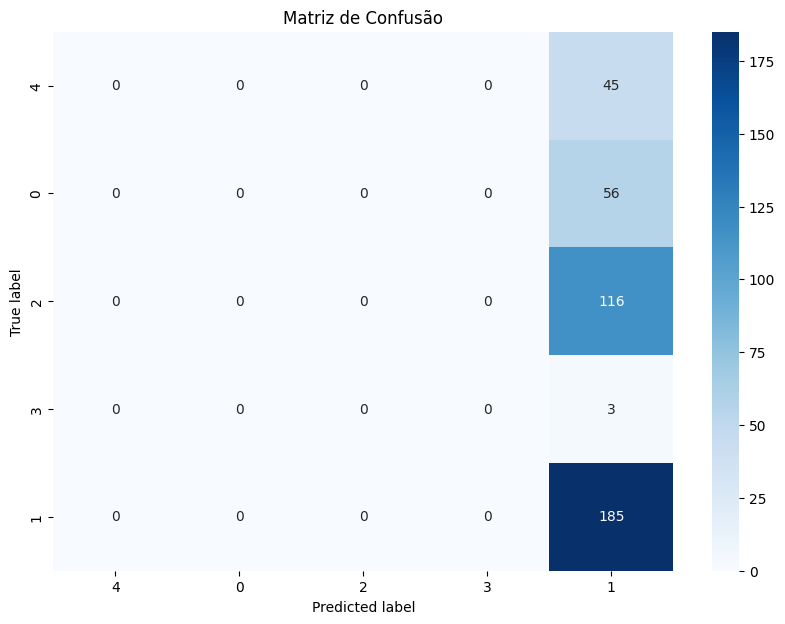

In [21]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, preds)
print(f'Acurácia: {accuracy:.2f}')

# Mostrar relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, preds))

# Mostrar a matriz de confusão
conf_mat = confusion_matrix(y_test, preds)
print("Matriz de Confusão:")
print(conf_mat)

# Obter os nomes das classes
class_names = y.unique()

# Verificar se o número de classes é igual ao tamanho da matriz de confusão
assert conf_mat.shape[0] == conf_mat.shape[1], 'A matriz de confusão deve ser quadrada'

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels= class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusão')
plt.show()